In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [22]:
"""
Two states model: Least Squares
m1 --> first slope
n1 --> first ordinate
m2 --> second slope
n2 --> second ordinate
x --> data
"""
def two_lin(x, m1, n1, m2, n2):
    return np.min([m1 * x + n1, m2 * x + n2], axis = 0)

In [23]:
"""
Array definition and curve fitting
"""
x = np.array([0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10])
y = np.array([2, 4, 8, 12, 14, 18, 20, 21, 22, 23,  24])

"""
Initial values
"""
start_values = [3, 0, 0, 3]
fit_param, pcov = curve_fit(two_lin, x, y, p0 = start_values)

In [24]:
"""
Output values for slopes/ordinates
"""
m1, n1, m2, n2 = fit_param
print("Values: ", m1, n1, m2, n2)

Values:  3.25714285119593 1.523809545475495 0.9999999999999999 14.0


In [25]:
"""
Sum of squared residuals to evaluate fitting quality
"""
r = y - two_lin(x, *fit_param)
print("Fit quality:", np.sum(np.square(r)))

Fit quality: 1.6761904761904767


In [26]:
"""
Interception point between two lines
"""
if m1 != m2:
    x_intersect = (n2 - n1) / (m1 - m2)
    print(x_intersect)
else:
    print("did not find two linear components")

5.527426165301895


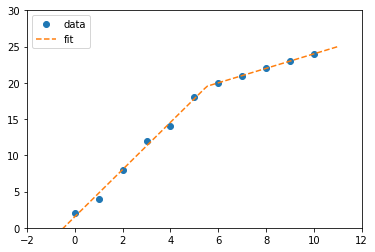

In [27]:
"""
Final plot
"""
x_fit = np.linspace(-1, 11, 100)  
plt.plot(x, y, 'o', label='data')
plt.plot(x_fit, two_lin(x_fit, *fit_param), '--', label='fit')

plt.axis([-2, 12, 0, 30])
plt.legend()
plt.show()